In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading in the dataset

df = pd.read_csv(r'C:\Users\seunt\Downloads\SUPERVISE ML UDEMY\datasets\Weight.csv')

df.head()

,Height,Weight
0,170.0,60.00
1,169.6,59.10
2,168.4,58.17
3,162.0,54.00
4,163.0,55.50


In [3]:
# splitting the data into independent and dependent variable

x = df.iloc[0: , 0].values
y = df.iloc[0: , 1].values

In [4]:
# reshaping x and y into 2-D from 1-D

x1 = np.reshape(x, (-1, 1))

y1 = np.reshape(y, (-1, 1))

In [5]:
x1.shape

(10, 1)

In [6]:
y1.shape

(10, 1)

In [7]:
# splitting the data into training and texting set

X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size = 0.7, random_state = 0)

In [8]:
# creating an instance for the Linear Regression

lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train) # fitting the model for the training data

y_pred = lin_reg.predict(X_train) # predicting the training data to compare with y_train

y_pred1 = lin_reg.predict(X_test) # predicting the testing data to compare with y_test

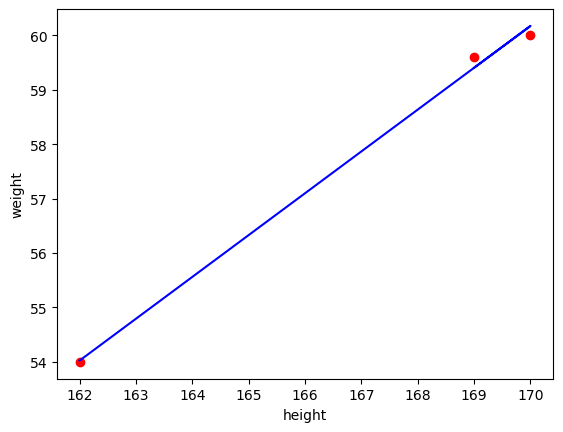

In [9]:
# visualizing the training data to see the overfitting effect

plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, y_pred, color = 'blue')
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

- From the plot above, we can see the regression line fitting so well on the training data and the SSR in this case is almost Zero becasue there is no much difference between the actual data points and the predicted data points.

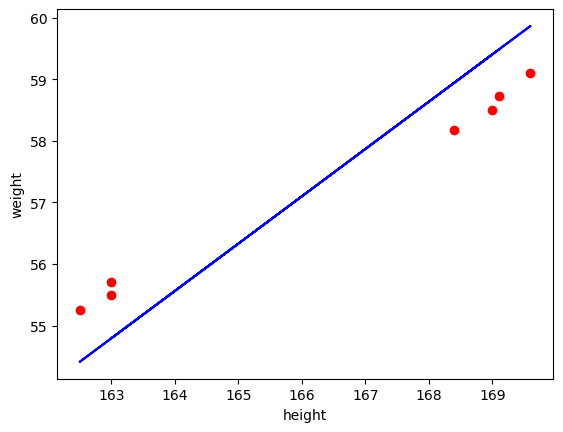

In [10]:
# visualizing the testing data to see the high variance in the testing data

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_pred1, color = 'blue')
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

- Now we test the trained model on the testing data and we can see the high variace between the actual data points and the regression line which represent the predicted values. The value of SSR in this case is high which means the model despite performing so well on the trining data as we see in the first plot performs poorly on the testing data, this we can refer to as overfitting.

In [11]:
# calculating the r-squared score for both the training and testing data in other to compare

r_squared = r2_score(Y_train, y_pred) # r-squared score for the training data

r_squared1 = r2_score(Y_test, y_pred1) # r-sqaured score for the testing dat

In [12]:
r_squared

0.9969443751558994

In [13]:
r_squared1

0.7377715676059698

- From the two values of the R-Squared, we can see that the model almost performed with 100% accuracy on the training data but not so well on the testing data. This we can call an overfitting effect where a model perform so well on training data but dissapoint with it's performance on the testing data.


## Introducing Bias with Ridge to See if it Will Address the Issue of Overfitting & High Variance

In [14]:
# let's create an instance for the Ridge Regression

rg_reg = Ridge(alpha = 10) # the value of alpha must be carefully considered to strike a balance between r-squared value of the
# training and testing data, the difference should not be more than 1%, in fact it should be less than 1%

rg_reg.fit(X_train, Y_train) # fitting the ridge regressor on the training data

y_pred2 = rg_reg.predict(X_train) # fitting the ridge regressor on the traing data for prediction for comparison

y_pred3 = rg_reg.predict(X_test) # fitting the ridge regressor on the testing data

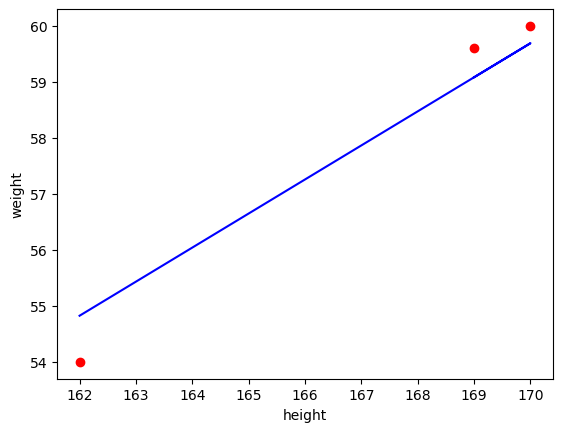

In [15]:
# visualizing the training data after regularization with ridge

plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, y_pred2, color = 'blue')
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

- This is the resulting plot after regularization with Ridge Regression. Introducing a small amount of bias result in the deviation of the initial perfectly fitting regression line, thereby increasing the SSR value from zero to a certain value, removing the overfitting effect.

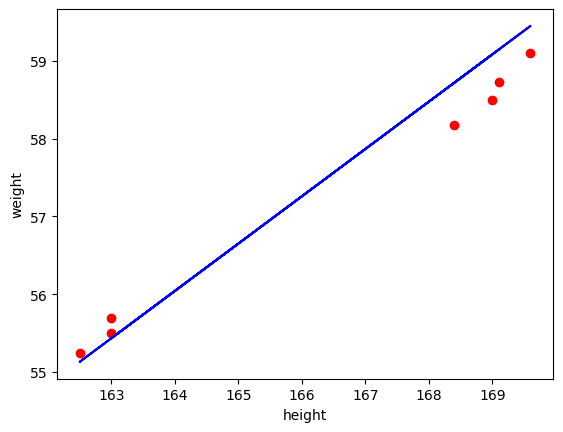

In [16]:
# visualizing the testing data after regularization with ridge

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, y_pred3, color = 'blue')
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

- And here from the plot above, we can see the regression line is now closer to the testing data points after regularization with some amount of bias, reducing the high variance obversed initially before regularization, which in-turn reduced the high value of the SSR.

In [17]:
# computing the r-squared values for both the training and testing data after regularization with ridge

r_squared2 = r2_score(Y_train, y_pred2)

r_squared3 = r2_score(Y_test, y_pred3)

In [18]:
# r-squared value for the training data after regularization

r_squared2 

0.9536742199842027

In [19]:
# r-squared value for the testing data after regularization

r_squared3 

0.941594672649175